# Time Series 时间序列

In [2]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)
# 一个cell输出多行语句
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Date and Time Data Types and Tools 日期和时间数据类型及工具

In [3]:
'''
1. python标准库包含用于日期（date）和时间（time）数据的数据类型，而且还有日历方面的功能
2. 主要会用到datetime、time以及calendar模块
3. datetime.datetime(简写为datetime)是用得最多的数据类型
'''
from datetime import datetime
now = datetime.now()
now
now.year, now.month, now.day

'\n1. python标准库包含用于日期（date）和时间（time）数据的数据类型，而且还有日历方面的功能\n2. 主要会用到datetime、time以及calendar模块\n3. datetime.datetime(简写为datetime)是用得最多的数据类型\n'

datetime.datetime(2019, 11, 1, 13, 10, 4, 727094)

(2019, 11, 1)

In [4]:
'''
1. datetime以毫秒形式存储日期和时间
2. timedelta表示两个datetime对象之间的时间差
'''
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta
delta.days
delta.seconds

'\n1. datetime以毫秒形式存储日期和时间\n2. timedelta表示两个datetime对象之间的时间差\n'

datetime.timedelta(days=926, seconds=56700)

926

56700

In [5]:
# 可以给datetime对象加上（或减去）一个或多个timedelta，这样产生一个新的对象
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)
start - 2 * timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String and Datetime 字符串和datetime的相互转换
利用str或strftime方法（传入一个格式化字符串），datetime对象和pandas的Timestamp对象都可以格式化为字符串

In [6]:
stamp = datetime(2011, 1, 3)
str(stamp)
stamp.strftime('%Y-%m-%d')

'2011-01-03 00:00:00'

'2011-01-03'

In [7]:
# datetime.strptime可以用格式化编码，将字符串格式化为日期
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

datetime.datetime(2011, 1, 3, 0, 0)

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [8]:
# datetime.strptime是通过已知格式进行日期解析的最佳方式
# 但是每次编写格式是很麻烦的事情，尤其对于一些常见的格式
# 这种情况下，可以用dateutil这个第三方包中parser.parse方法（pandas自动安装好）
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [9]:
# dateutil可以解析几乎所有人类能够理解的日期表示形式
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [10]:
# 在国际通用格式中，日出现在月的前面很普遍，传入dayfirst=True即可解决这个问题
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [11]:
# pandas通常用于处理组日期的，不管这些日期是DataFrame的轴索引还是列。
# to_datetime方法可以解析多种不同的日期表示形式。对标准日期格式（如ISO8601）的解析非常快
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [12]:
# 它还可以处理缺失值（None、空字符串等）
idx = pd.to_datetime(datestrs + [None])
idx
# NaT：Not a Time，是pandas中时间戳数据的null值
idx[2]
pd.isnull(idx)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

NaT

array([False, False,  True])

## Time Series Basics 时间序列基础
pandas最基本的时间序列类型就是以时间戳（通常以Python字符串或datetime对象表示）为索引的Series

In [13]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [14]:
# 这些datetime对象实际上是被放在一个DatetimeIndex中的
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [15]:
# 跟其他Series一样，不同索引的时间序列之间的算术运算会自动按日期对齐
# ts[::2]每隔两个取一个
ts + ts[::2]

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [16]:
# pandas用NumPy的datetime64数据类型以纳秒形式存储时间戳
ts.index.dtype

dtype('<M8[ns]')

In [17]:
# DatetimeIndex中的各个标量值是pandas的Timestamp对象
# 只要有需要，Timestamp可以随时自动转换为datetime对象
# 此外，它还可以存储频率信息，且知道如何执行时区转换以及其他操作
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting 索引、选取、子集构造

In [18]:
# 当你根据标签索引选取数据时，时间序列和其它的pandas.Series很像
stamp = ts.index[2]
ts[stamp]

-0.5194387150567381

In [19]:
# 还有一个更为方便的方法：传入一个可以被解释为日期的字符串
ts['1/10/2011']
ts['20110110']

1.9657805725027142

1.9657805725027142

In [20]:
# 对于较长的时间序列，只需传入“年”或“年月”即可轻松选取数据的切片
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts
longer_ts['2001']

2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
                ...   
2002-09-22    0.930944
2002-09-23   -0.811676
2002-09-24   -1.830156
2002-09-25   -0.138730
2002-09-26    0.334088
Freq: D, Length: 1000, dtype: float64

2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
                ...   
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [21]:
# 这里的2001被解释成年，并根据它选取时间区间。指定月也同样奏效
longer_ts['2001-05']

2001-05-01   -0.622547
2001-05-02    0.936289
2001-05-03    0.750018
2001-05-04   -0.056715
2001-05-05    2.300675
                ...   
2001-05-27    0.235477
2001-05-28    0.111835
2001-05-29   -1.251504
2001-05-30   -2.949343
2001-05-31    0.634634
Freq: D, Length: 31, dtype: float64

In [22]:
# datetime对象也可以进行切片
ts[datetime(2011, 1, 7):]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [23]:
# 由于大部分时间序列数据都是按照时间先后排序的，因此你也可以用不存在于
# 该时间序列中的时间戳对其进行切片（即范围查询）
ts
# 时间范围查询
ts['1/6/2011':'1/11/2011']

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [24]:
# 跟之前一样，可以传入字符串日期、datetime或Timestamp。
# 注意，这样切片所产生的原时间的视图，跟NumPy数组的切片运算是一样的
# 这意味着，没有数据被复制，对切片进行修改会反映到原始数据上

# 此外，还有一个等价的实例方法，也可以截取两个日期之间的TimeSeries
ts.truncate(after='1/9/2011')

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [25]:
# 这些操作对DataFrame也有效。例如，对DataFrame的行进行索引
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.006045,0.490094,-0.277186,-0.707213
2001-05-09,-0.560107,2.735527,0.927335,1.513906
2001-05-16,0.538600,1.273768,0.667876,-0.969206
2001-05-23,1.676091,-0.817649,0.050188,1.951312
2001-05-30,3.260383,0.963301,1.201206,-1.852001


### Time Series with Duplicate Indices 带有重复索引的时间序列

In [26]:
# 在某些应用场景中，可能会存在多个观测数据落在同一个时间点上的情况
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [27]:
# 通过检查索引的is_unique属性，可以知道它是不是唯一的
dup_ts.index.is_unique

False

In [28]:
# 对这个时间序列进行索引，要么产生标量值，要么产生切片，具体要看所选的时间点是否重复
dup_ts['1/3/2000']  # not duplicated
dup_ts['1/2/2000']  # duplicated

4

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [29]:
# 假设对具有非唯一时间戳的数据进行聚合。一个办法是使用groupby，并传入level=0
grouped = dup_ts.groupby(level=0)
grouped.mean()
grouped.count()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges, Frequencies, and Shifting 日期的范围、频率以及移动
pandas中的原生时间序列一般被认为是不规则的，也就是说，它们没有固定的频率。对于大部分应用程序而且，是无所谓的。

但是，它常常需要以某种相对固定的频率进行分析，比如，每日、每月、每15分钟等（这样自然会在时间序列中引入缺失值）。

幸运的是，pandas有一整套标准时间序列频率以及用于重采样、频率推断、生成固定频率日期范围工具。

例如，可以将之前的那个时间序列转换为一个固定频率（每日）的时间序列，只需要调用resample即可

In [30]:
# 字符串D是每天的意思，频率的转换（或重采样）是一个比较大的主题，后面还会讲解。
ts
resampler = ts.resample('D')

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

### Generating Date Ranges 生成日期范围
pandas.date_range可用于根指定频率生成指定长度的DatetimeIndex

In [31]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [32]:
# 默认情况，date_range会产生按天计算的时间点。
# 如果只传入起始或结束时间，那就还得传入一个表示一段时间的数字
pd.date_range(start='2012-04-01', periods=20)
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [33]:
# 起始和借宿日期定义了日期索引的严格边界。例如，如果你想要生成一个由每月最后
# 一个工作日组成的日期索引，可以传入“BM”频率（表示business end of month）
# 这样只包含时间间隔内（或刚好在边界上的）符合频率要求的日期
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [34]:
# date_range默认会保留起始和结束时间戳的时间信息（如果有的话）
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [35]:
# 有时，虽然起始和结束日期带有时间信息，但你希望产生一组被规范化(normalize)到午夜的时间戳。
# normalize选项即可实现该功能
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets 频率和日期偏移量
pandas中的频率是由一个基础频率(base frequency)和一组乘数组成的。

基础频率通常以一个字符串别名表示，比如：“M”表示月，“H”表示每小时。

对于每个基础频率，都有一个被称为日期偏移量（date offset）的对象与之对应。

例如：按每小时计算的频率可以用Hour类表示

In [36]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [37]:
# 传入一个整数即可定义偏移量的倍数
four_hours = Hour(4)
four_hours

<4 * Hours>

In [38]:
# 一般来说，无需明确创建这样的对象，只需使用诸如“H”或“4H”这样的字符串别名即可。
# 在基础频率前面放上一个整数即可创建倍数
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [39]:
# 大部分偏移量对象都可通过加法进行连接
Hour(2) + Minute(30)

<150 * Minutes>

In [40]:
# 同理，也可以传入频率字符串（如：“2h30min”），这种字符串都可以被高效的解析为等效的表达式。
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates WOM日期
WOM日期（Week of month）是一种非常实用的频率类，以WOM开头。

它使你能获得诸如“每月第三个星期五”之类的日期

In [41]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading and Lagging) Data 移动（超前和滞后）数据
移动指的是沿着时间轴将数据前移或后移。Series和DataFrame都有一个shift方法用于执行单纯的前移或后移操作，保持索引不变

In [42]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts
ts.shift(2)
ts.shift(-2)

2000-01-31   -0.066748
2000-02-29    0.838639
2000-03-31   -0.117388
2000-04-30   -0.517795
Freq: M, dtype: float64

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.066748
2000-04-30    0.838639
Freq: M, dtype: float64

2000-01-31   -0.117388
2000-02-29   -0.517795
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

当移动时，就会在时间序列前面或后面产生缺失数据
shift通常用于计算一个时间序列或多个时间序列（如DataFrame列）中的百分比变化。如下表达：
ts / ts.shift(1) - 1

In [43]:
# 单纯的移位操作不会修改索引，所以部分数据会被丢弃。
# 因此，如果频率已知，则可以将其传递给shift以便实现对时间戳进行位移，
# 而不是对数据进行简单位移
ts.shift(2, freq='M')

2000-03-31   -0.066748
2000-04-30    0.838639
2000-05-31   -0.117388
2000-06-30   -0.517795
Freq: M, dtype: float64

In [44]:
# 使用其他频率
ts.shift(3, freq='D')
ts.shift(1, freq='90T')

2000-02-03   -0.066748
2000-03-03    0.838639
2000-04-03   -0.117388
2000-05-03   -0.517795
dtype: float64

2000-01-31 01:30:00   -0.066748
2000-02-29 01:30:00    0.838639
2000-03-31 01:30:00   -0.117388
2000-04-30 01:30:00   -0.517795
Freq: M, dtype: float64

#### Shifting dates with offsets 通过偏移量对日期进行位移
pandas的日期偏移量还可以用在datetime或Timestamp对象上

In [45]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [46]:
# 如果是加锚点偏移量（比如MonthEnd），第一次增量会将原日期向前滚动到
# 符合频率规则的下一个日期
now + MonthEnd()
now + MonthEnd(2)

Timestamp('2011-11-30 00:00:00')

Timestamp('2011-12-31 00:00:00')

In [47]:
# 通过锚点偏移量的rollforward和rollback方法，可明确地将日期向前或向后“滚动”
offset = MonthEnd()
offset.rollforward(now)
offset.rollback(now)

Timestamp('2011-11-30 00:00:00')

Timestamp('2011-10-31 00:00:00')

In [48]:
# 日期偏移量还有一个巧妙的用法，即结合groupby使用这两个“滚动”方法
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts
# 滚动到月末最后一天，然后对数据求平均
ts.groupby(offset.rollforward).mean()

2000-01-15   -0.116696
2000-01-19    2.389645
2000-01-23   -0.932454
2000-01-27   -0.229331
2000-01-31   -1.140330
2000-02-04    0.439920
2000-02-08   -0.823758
2000-02-12   -0.520930
2000-02-16    0.350282
2000-02-20    0.204395
2000-02-24    0.133445
2000-02-28    0.327905
2000-03-03    0.072153
2000-03-07    0.131678
2000-03-11   -1.297459
2000-03-15    0.997747
2000-03-19    0.870955
2000-03-23   -0.991253
2000-03-27    0.151699
2000-03-31    1.266151
Freq: 4D, dtype: float64

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
dtype: float64

In [49]:
# 更简单、更快速的方法：使用resample进行重采样
ts.resample('M').mean()

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
Freq: M, dtype: float64

## Time Zone Handling 时区处理
时间序列处理工作中，最让人不爽的就是对时区的处理

许多人都选择以协调世界时（UTC，格林尼治标准时间的接替者，目前已经是最标准的了）

时区是以UTC偏移量的形式表示的，例如：夏令时期间，纽约比UTC慢4小时，而全年其它时间则比UTC慢5小时

Python中，时区信息来自第三方库pytz，使之可以使用Olson数据库（汇编了世界时区信息）。这对历史数据非常重要，这是因为由于各地政府的各种突发奇想，夏令时转变日期（甚至UTC偏移量）已经发生过多次改变了。就拿美国来说，DST转变时间自1900年以来就改变过多次！

pandas包装了pytz的功能，要记住的是：时区名称

In [50]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [51]:
# 要从pytz中获取时区对象，使用pytz.timezone即可
# pandas中的方法，既可以接受时区名，也可以接受这些对象
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion 时区本地化和转换

In [52]:
# 默认情况下，pandas中的时间序列是单纯（naive）的时区，如下：
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.202469
2012-03-10 09:30:00    0.050718
2012-03-11 09:30:00    0.639869
2012-03-12 09:30:00    0.597594
2012-03-13 09:30:00   -0.797246
2012-03-14 09:30:00    0.472879
Freq: D, dtype: float64

In [53]:
# 其索引的tz字段为None
print(ts.index.tz)

None


In [54]:
# 用时区集生成日期范围
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [55]:
# 从单纯到本地化的转换是通过tz_localize方法处理的
ts
ts_utc = ts.tz_localize('UTC')
ts_utc
ts_utc.index

2012-03-09 09:30:00   -0.202469
2012-03-10 09:30:00    0.050718
2012-03-11 09:30:00    0.639869
2012-03-12 09:30:00    0.597594
2012-03-13 09:30:00   -0.797246
2012-03-14 09:30:00    0.472879
Freq: D, dtype: float64

2012-03-09 09:30:00+00:00   -0.202469
2012-03-10 09:30:00+00:00    0.050718
2012-03-11 09:30:00+00:00    0.639869
2012-03-12 09:30:00+00:00    0.597594
2012-03-13 09:30:00+00:00   -0.797246
2012-03-14 09:30:00+00:00    0.472879
Freq: D, dtype: float64

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [56]:
# 用tz_convert转换到别的时区
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.202469
2012-03-10 04:30:00-05:00    0.050718
2012-03-11 05:30:00-04:00    0.639869
2012-03-12 05:30:00-04:00    0.597594
2012-03-13 05:30:00-04:00   -0.797246
2012-03-14 05:30:00-04:00    0.472879
Freq: D, dtype: float64

In [57]:
# 将其本地化到America/New_York（EST美国东部时间）,然后再转换到UTC或柏林时间
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 14:30:00+00:00   -0.202469
2012-03-10 14:30:00+00:00    0.050718
2012-03-11 13:30:00+00:00    0.639869
2012-03-12 13:30:00+00:00    0.597594
2012-03-13 13:30:00+00:00   -0.797246
2012-03-14 13:30:00+00:00    0.472879
Freq: D, dtype: float64

2012-03-09 15:30:00+01:00   -0.202469
2012-03-10 15:30:00+01:00    0.050718
2012-03-11 14:30:00+01:00    0.639869
2012-03-12 14:30:00+01:00    0.597594
2012-03-13 14:30:00+01:00   -0.797246
2012-03-14 14:30:00+01:00    0.472879
Freq: D, dtype: float64

In [58]:
# tz_localize和tz_convert也是DatetimeIndex的实例方法
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### Operations with Time Zone−Aware Timestamp Objects 操作时区意识型Timestamp对象
跟时间序列和日期范围差不多，独立的Timestamp对象也能被从单纯的(naive)本地化为时区意识型（time zone-aware）

并从一个时区转变为另一个时区

In [59]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [60]:
# 创建Timestamp对象时，传入一个时区信息tz
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [61]:
# Timestamp对象在内部保存了一个UTC时间戳值（自UNIX纪元（1970年1月1日）算起的纳秒数）。
# 这个UTC值在时区转换过程中是不会发生变化的
stamp_utc.value
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

1299902400000000000

In [62]:
# 当时用pandas的DateOffset对象执行时间算术计算时，运算过程会自动关注是否存在夏令时转变期。
# 这里，我们创建了在DST转变之前的时间戳。首先，来看夏令时转变前的30分钟：
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp
stamp + Hour()

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [63]:
# 夏令时转变前90分钟
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp
stamp + 2 * Hour()

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones 不同时区之间的运算

In [64]:
# 如果两个时间序列的时区不同，在将它们合并到一起时，最终结果会是UTC。
# 由于时间戳其实是以UTC存储的，所以这是一个很简单的运算，并不需要发生任何转换。
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

2012-03-07 09:30:00    0.522356
2012-03-08 09:30:00   -0.546348
2012-03-09 09:30:00   -0.733537
2012-03-12 09:30:00    1.302736
2012-03-13 09:30:00    0.022199
2012-03-14 09:30:00    0.364287
2012-03-15 09:30:00   -0.922839
2012-03-16 09:30:00    0.312656
2012-03-19 09:30:00   -1.128497
2012-03-20 09:30:00   -0.333488
Freq: B, dtype: float64

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## Periods and Period Arithmetic 日期及其算术运算

In [65]:
# 时期（period）表示的是时间区间，比如数日、数月、数季、数年等。
# Period类表示的就是这种数据类型，其构造函数需要用到一个字符串或整数，以及频率
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [66]:
# 这里，这个Period对象表示的是从2007年1月1日到2007年12月31日之间的整数时间。
# 只需对Period对象加上或减去一个整数即可达到根据其频率进行位移的效果
p + 5
p - 2

Period('2012', 'A-DEC')

Period('2005', 'A-DEC')

In [67]:
# 如果两个Period对象拥有相同的频率，则它们的差就是它们之间的单位数量
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [68]:
# period_range函数可用于创建规则的日期范围
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [69]:
# PeriodIndex类保存了一组Period，可以在任何pandas数据结构中被用作轴索引
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.514551
2000-02   -0.559782
2000-03   -0.783408
2000-04   -1.797685
2000-05   -0.172670
2000-06    0.680215
Freq: M, dtype: float64

In [70]:
# 如果有一个字符串数组，也可以使用PeriodIndex类
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion 时期的频率转换
Period和PeriodIndex对象都可以通过其asfreq方法被转换成别的频率。

假设有一个年度时期，希望将其转换为当年年初或年末的一个月度时期。

In [71]:
p = pd.Period('2007', freq='A-DEC')
p
p.asfreq('M', how='start')
p.asfreq('M', how='end')

Period('2007', 'A-DEC')

Period('2007-01', 'M')

Period('2007-12', 'M')

In [72]:
# 你可以将Period('2007','A-DEC')看做一个被划分为多个月度时期的时间段中的游标
p = pd.Period('2007', freq='A-JUN')
p
p.asfreq('M', 'start')
p.asfreq('M', 'end')

Period('2007', 'A-JUN')

Period('2006-07', 'M')

Period('2007-06', 'M')

In [73]:
# 在将高频率转换为低频率时，超时期（subperiod）是由子时期（subperiod）所属的位置决定的。
# 例如：在A-JUN频率中，月份“2007年8月”实际上是属于周期“2008年”的
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [74]:
# 完整的PeriodIndex或TimeSeries的频率转换方式也是如此：
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.asfreq('M', how='start')

2006    1.607578
2007    0.200381
2008   -0.834068
2009   -0.302988
Freq: A-DEC, dtype: float64

2006-01    1.607578
2007-01    0.200381
2008-01   -0.834068
2009-01   -0.302988
Freq: M, dtype: float64

In [75]:
# 这里，根据年度时期的第一个月，每年的时期被取代的每月的时期。
# 如果我们想要每年的最后一个工作日，可以使用“B”频率，并指明想要该时期的末尾：
ts.asfreq('B', how='end')

2006-12-29    1.607578
2007-12-31    0.200381
2008-12-31   -0.834068
2009-12-31   -0.302988
Freq: B, dtype: float64

### Quarterly Period Frequencies 按季度计算的日期频率
季度型数据在会计、金融等领域中很常见。许多季度型数据都会涉及“财年末”的概念，

通常是一年12个月中某月的最后一个日历日或工作日。就这一点来说，时期“2012Q4”

根据财年末的不同会有不同的含义。pandas支持12种可能的季度型频率，即Q-JAN到Q-DEC

In [76]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [77]:
# 在以1月结束的财年中，2012Q4是从11月到1月（将其转换为日型频率就明白了）
p.asfreq('D', 'start')
p.asfreq('D', 'end')

Period('2011-11-01', 'D')

Period('2012-01-31', 'D')

In [78]:
# 因此Period之间的算术运算会非常简单，例如：要获取该季度倒数第二个工作日下午4点的时间戳，
# 可以这样：
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm
p4pm.to_timestamp()

Period('2012-01-30 16:00', 'T')

Timestamp('2012-01-30 16:00:00')

In [79]:
# period_range可用于生成季度型范围。季度型范围的算术运算也跟上面一样
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods (and Back) 将Timestamp转换为Period（及其反向过程）

In [80]:
# 通过使用to_period方法，可以将有时间戳索引的Series和DataFrame对象转换为以日期索引：
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts
pts = ts.to_period()
pts

2000-01-31    1.663261
2000-02-29   -0.996206
2000-03-31    1.521760
Freq: M, dtype: float64

2000-01    1.663261
2000-02   -0.996206
2000-03    1.521760
Freq: M, dtype: float64

In [81]:
# 由于时期指的是非重叠时间区间，因此对于给定的频率，一个时间戳只能属于一个时期。
# 新PeriodIndex的频率默认是从时间戳推断而来的，你也可以指定任何别的频率。
# 结果中允许存在重复时期：
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2
ts2.to_period('M')

2000-01-29    0.244175
2000-01-30    0.423331
2000-01-31   -0.654040
2000-02-01    2.089154
2000-02-02   -0.060220
2000-02-03   -0.167933
Freq: D, dtype: float64

2000-01    0.244175
2000-01    0.423331
2000-01   -0.654040
2000-02    2.089154
2000-02   -0.060220
2000-02   -0.167933
Freq: M, dtype: float64

In [82]:
# 要转换回时间戳，使用to_timestamp即可
pts = ts2.to_period()
pts
pts.to_timestamp(how='end')

2000-01-29    0.244175
2000-01-30    0.423331
2000-01-31   -0.654040
2000-02-01    2.089154
2000-02-02   -0.060220
2000-02-03   -0.167933
Freq: D, dtype: float64

2000-01-29 23:59:59.999999999    0.244175
2000-01-30 23:59:59.999999999    0.423331
2000-01-31 23:59:59.999999999   -0.654040
2000-02-01 23:59:59.999999999    2.089154
2000-02-02 23:59:59.999999999   -0.060220
2000-02-03 23:59:59.999999999   -0.167933
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays 通过数组创建PeriodIndex
固定频率的数据集通常会将时间信息分开存放在多个列中。

例如：在下面的宏观经济数据集中，年度和季度就分别存放在不同的列中。

In [83]:
data = pd.read_csv('examples/macrodata.csv')
data.head(5)
data.year
data.quarter

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [84]:
# 通过将这些数据以及一个频率传入PeriodIndex，就可以将它们合并成DataFrame的一个索引
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index
data.index = index
data.infl

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## Resampling and Frequency Conversion 重采样及频率转换

重采样（resampling）指的是将时间序列从一个频率转换到另一个频率的处理过程。将高频率数据聚合到低频率称为降采样（downsampling），而将低频率数据转换到高频率则称为升采样（upsampling）。并不是所有的重采样都能被划分到这两个大类中。例如，将W-WED（每周三）转换为W-FRI既不是降采样也不是升采样。

pandas对象都带有一个resample方法，它是各种频率转换工作的主力函数。resample有一个类似于groupby的API，调用resample可以分组数据，然后会调用一个聚合函数：

In [85]:
# resample是一个灵活高效的方法，可用于处理非常大的时间序列。我将通过一系列的示例说明其用法。
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.resample('M').mean()
ts.resample('M', kind='period').mean()

2000-01-01    0.631634
2000-01-02   -1.594313
2000-01-03   -1.519937
2000-01-04    1.108752
2000-01-05    1.255853
                ...   
2000-04-05   -0.423776
2000-04-06    0.789740
2000-04-07    0.937568
2000-04-08   -2.253294
2000-04-09   -1.772919
Freq: D, Length: 100, dtype: float64

2000-01-31   -0.165893
2000-02-29    0.078606
2000-03-31    0.223811
2000-04-30   -0.063643
Freq: M, dtype: float64

2000-01   -0.165893
2000-02    0.078606
2000-03    0.223811
2000-04   -0.063643
Freq: M, dtype: float64

### Downsampling 降采样
将数据聚合到规律的低频率是一件非常普通的时间序列处理任务。待聚合的数据不必拥有固定的频率，期望的频率会自动定义聚合的面元边界，这些面元用于将时间序列拆分为多个片段。例如，要转换到月度频率（'M'或'BM'），数据需要被划分到多个单月时间段中。各时间段都是半开放的。一个数据点只能属于一个时间段，所有时间段的并集必须能组成整个时间帧。在用resample对数据进行降采样时，需要考虑两样东西： 

* 各区间哪边是闭合的。 
* 如何标记各个聚合面元，用区间的开头还是末尾。 

为了说明，我们来看一些“1分钟”数据：

In [86]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [87]:
# 假设你想要通过求和的方式将这些数据聚合到“5分钟”块中：
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [88]:
# 传入的频率将会以“5分钟”的增量定义面元边界。
# 默认情况下，面元的右边界是包含的，因此00:00到00:05的区间中是包含00:05的。
# 传入closed='left'会让区间以左边界闭合：
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [89]:
# 如你所见，最终的时间序列是以各面元右边界的时间戳进行标记的。
# 传入label='right'即可用面元的邮编界对其进行标记：
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [90]:
# 最后，你可能希望对结果索引做一些位移，
# 比如从右边界减去一秒以便更容易明白该时间戳到底表示的是哪个区间。
# 只需通过loffset设置一个字符串或日期偏移量即可实现这个目的：
# 此外，也可以通过调用结果对象的shift方法来实现该目的，这样就不需要设置loffset了。
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

#### Open-High-Low-Close (OHLC) resampling OHLC重采样

金融领域中有一种无所不在的时间序列聚合方式，即计算各面元的四个值：

第一个值（open，开盘）、最后一个值（close，收盘）、最大值（high，最高）以及最小值（low，最低）。

传入how='ohlc'即可得到一个含有这四种聚合值的DataFrame。

整个过程很高效，只需一次扫描即可计算出结果：

In [91]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation 升采样和插值

在将数据从低频率转换到高频率时，就不需要聚合了。我们来看一个带有一些周型数据的DataFrame：

In [92]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [93]:
# 当你对这个数据进行聚合，每组只有一个值，这样就会引入缺失值。
# 我们使用asfreq方法转换成高频，不经过聚合：
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [94]:
# 假设你想要用前面的周型值填充“非星期三”。resampling的填充和插值方式跟fillna和reindex的一样：
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-07,-0.896431,0.677263,0.036503,0.087102
2000-01-08,-0.896431,0.677263,0.036503,0.087102
2000-01-09,-0.896431,0.677263,0.036503,0.087102
2000-01-10,-0.896431,0.677263,0.036503,0.087102
2000-01-11,-0.896431,0.677263,0.036503,0.087102
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [95]:
# 同样，这里也可以只填充指定的时期数（目的是限制前面的观测值的持续使用距离）：
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-07,-0.896431,0.677263,0.036503,0.087102
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [96]:
# 注意，新的日期索引完全没必要跟旧的重叠：
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-13,-0.046662,0.927238,0.482284,-0.867130


### Resampling with Periods 通过时期进行重采样

对那些使用时期索引的数据进行重采样与时间戳很像：

In [97]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000-01,0.493841,-0.155434,1.397286,1.507055
2000-02,-1.179442,0.443171,1.395676,-0.529658
2000-03,0.787358,0.248845,0.743239,1.267746
2000-04,1.302395,-0.272154,-0.051532,-0.467740
2000-05,-1.040816,0.426419,0.312945,-1.115689


,Colorado,Texas,New York,Ohio
2000,0.556703,0.016631,0.111873,-0.027445
2001,0.046303,0.163344,0.251503,-0.157276


In [98]:
# 升采样要稍微麻烦一些，因为你必须决定在新频率中各区间的哪端用于放置原来的值，
# 就像asfreq方法那样。convention参数默认为'start'，也可设置为'end'：
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.556703,0.016631,0.111873,-0.027445
2000Q2,0.556703,0.016631,0.111873,-0.027445
2000Q3,0.556703,0.016631,0.111873,-0.027445
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.046303,0.163344,0.251503,-0.157276
2001Q2,0.046303,0.163344,0.251503,-0.157276
2001Q3,0.046303,0.163344,0.251503,-0.157276
2001Q4,0.046303,0.163344,0.251503,-0.157276


,Colorado,Texas,New York,Ohio
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.556703,0.016631,0.111873,-0.027445
2001Q2,0.556703,0.016631,0.111873,-0.027445
2001Q3,0.556703,0.016631,0.111873,-0.027445
2001Q4,0.046303,0.163344,0.251503,-0.157276


In [99]:
# 由于时期指的是时间区间，所以升采样和降采样的规则就比较严格： 
# 在降采样中，目标频率必须是源频率的子时期（subperiod）。
# 在升采样中，目标频率必须是源频率的超时期（superperiod）。
# 如果不满足这些条件，就会引发异常。这主要影响的是按季、年、周计算的频率。
# 例如，由Q-MAR定义的时间区间只能升采样为A-MAR、A-JUN、A-SEP、A-DEC等： 
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.556703,0.016631,0.111873,-0.027445
2001Q2,0.556703,0.016631,0.111873,-0.027445
2001Q3,0.556703,0.016631,0.111873,-0.027445
2001Q4,0.046303,0.163344,0.251503,-0.157276
2002Q1,0.046303,0.163344,0.251503,-0.157276
2002Q2,0.046303,0.163344,0.251503,-0.157276
2002Q3,0.046303,0.163344,0.251503,-0.157276


## Moving Window Functions 移动窗口函数

在移动窗口（可以带有指数衰减权数）上计算的各种统计函数也是一类常见于时间序列的数组变换。这样可以圆滑噪音数据或断裂数据。我将它们称为移动窗口函数（moving window function），其中还包括那些窗口不定长的函数（如指数加权移动平均）。跟其他统计函数一样，移动窗口函数也会自动排除缺失值。 

开始之前，我们加载一些时间序列数据，将其重采样为工作日频率：

In [100]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

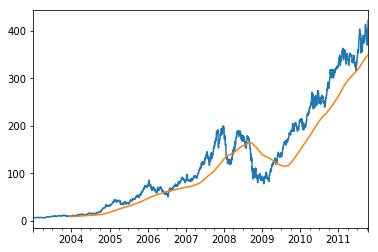

In [101]:
# 现在引入rolling运算符，它与resample和groupby很像。
# 可以在TimeSeries或DataFrame以及一个window（表示期数，见图11-4）上调用它：
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [102]:
# 表达式rolling(250)与groupby很像，但不是对其进行分组，
# 而是创建一个按照250天分组的滑动窗口对象。然后，
# 我们就得到了苹果公司股价的250天的移动窗口。 
# 默认情况下，rolling函数需要窗口中所有的值为非NA值。
# 可以修改该行为以解决缺失数据的问题。其实，在时间序列开始处尚不足窗口期的那些数据就是个特例（见图）：
plt.figure()

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

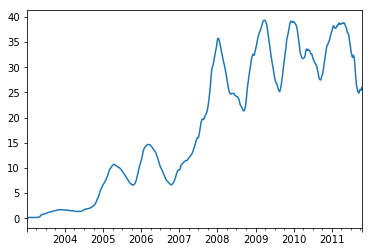

In [103]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]
appl_std250.plot()

In [104]:
# 要计算扩展窗口平均（expanding window mean），
# 可以使用expanding而不是rolling。
# “扩展”意味着，从时间序列的起始处开始窗口，
# 增加窗口直到它超过所有的序列。apple_std250时间序列的扩展窗口平均如下所示：
expanding_mean = appl_std250.expanding().mean()

In [105]:
plt.figure()

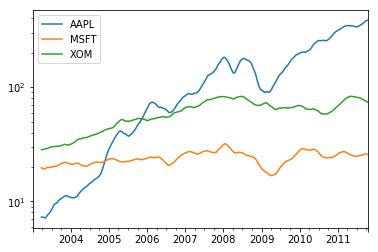

In [106]:
# 对DataFrame调用rolling_mean（以及与之类似的函数）会将转换应用到所有的列上（见图）：
close_px.rolling(60).mean().plot(logy=True)

In [107]:
# rolling函数也可以接受一个指定固定大小时间补偿字符串，
# 而不是一组时期。这样可以方便处理不规律的时间序列。
# 这些字符串也可以传递给resample。例如，我们可以计算20天的滚动均值，如下所示： 
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions 指数加权函数
另一种使用固定大小窗口及相等权数观测值的办法是，定义一个衰减因子（decay factor）常量，以便使近期的观测值拥有更大的权数。

衰减因子的定义方式有很多，比较流行的是使用时间间隔（span），它可以使结果兼容于窗口大小等于时间间隔的简单移动窗口（simple moving window）函数。 

由于指数加权统计会赋予近期的观测值更大的权数，因此相对于等权统计，它能“适应”更快的变化。 

除了rolling和expanding，pandas还有ewm运算符。下面这个例子对比了苹果公司股价的30日移动平均和span=30的指数加权移动平均（如图所示）：

In [108]:
plt.figure()

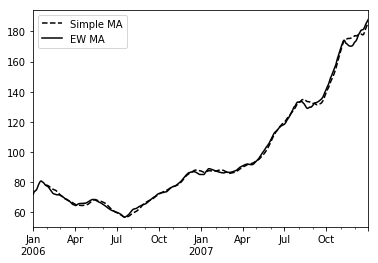

In [109]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### Binary Moving Window Functions 二元移动窗口函数
有些统计运算（如相关系数和协方差）需要在两个时间序列上执行。

例如，金融分析师常常对某只股票对某个参考指数（如标准普尔500指数）的相关系数感兴趣。

要进行说明，我们先计算我们感兴趣的时间序列的百分数变化：

In [110]:
plt.figure()

In [111]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

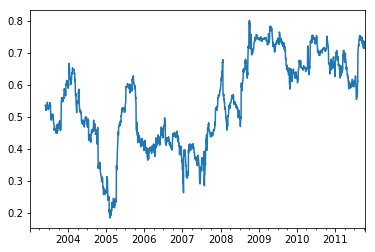

In [112]:
# 调用rolling之后，corr聚合函数开始计算与spx_rets滚动相关系数（结果见图）：
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [113]:
# 假设你想要一次性计算多只股票与标准普尔500指数的相关系数。
# 虽然编写一个循环并新建一个DataFrame不是什么难事，但比较啰嗦。
# 其实，只需传入一个TimeSeries和一个DataFrame，
# rolling_corr就会自动计算TimeSeries（本例中就是spx_rets）与DataFrame各列的相关系数。结果如图所示：
plt.figure()

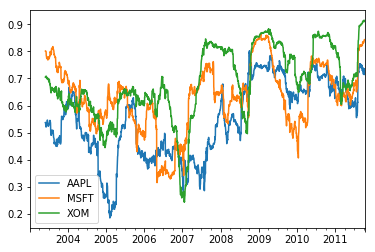

In [114]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions 用户定义的移动窗口函数
rolling_apply函数使你能够在移动窗口上应用自己设计的数组函数。唯一要求的就是：该函数要能从数组的各个片段中产生单个值（即约简）。

比如说，当我们用rolling(...).quantile(q)计算样本分位数时，可能对样本中特定值的百分等级感兴趣。scipy.stats.percentileofscore函数就能达到这个目的（结果见图）：

In [115]:
# 如果你没安装SciPy，可以使用conda或pip安装。
plt.figure()

/Users/panliu/.local/share/virtualenvs/pydata-book-oZ7iJid9/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until


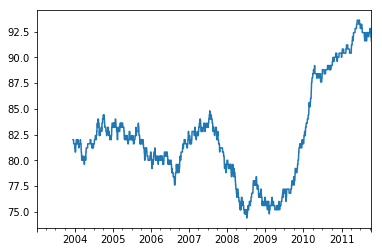

In [116]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

In [117]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion